# Creating a model that can predict if a student can be admitted into the institution or not 
![Image](https://tse2.mm.bing.net/th?id=OIP.4o60fvppoRqx_J0Agcs0cQHaDt&pid=Api&P=0&w=351&h=176)

# understnding the problem statment :
-Every year thousands of applications are being submitted by international students for admission in colleges of the USA. It becomes an iterative task for the Education Department to know the total number of applications received and then compare that data with the total number of applications successfully accepted and visas processed. Hence to make the entire process easy, the education department in the US analyze the factors that influence the admission of a student into colleges. The objective of this exercise is to analyse the same.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")



In [2]:
data=pd.read_csv("College_admission.csv")
data.head()

,Admitted,GRE,GPA,Finacial status,Gender,Race,Rank
0,No,380,3.61,Low,Female,AfricanAmerican,3
1,Yes,660,3.67,Medium,Female,Asian,3
2,Yes,800,4.00,Medium,Female,Asian,1
3,Yes,640,3.19,Low,Male,Asian,4
4,No,520,2.93,High,Male,Asian,4


In [3]:
data.shape

(400, 7)

<AxesSubplot:>

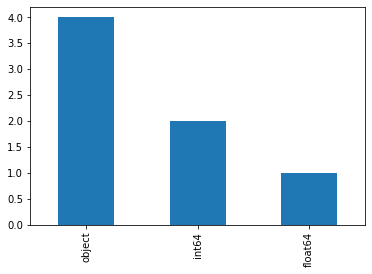

In [4]:
dtypes=data.dtypes.value_counts()
dtypes.plot(kind="bar")

In [5]:
data.isna().sum()

Admitted            0
GRE                 0
GPA                 0
Finacial status     0
Gender              0
Race                0
Rank                0
dtype: int64

# Univarient Analysis

In [6]:
Race_df=data["Race"].value_counts().reset_index()
Race_df.rename(columns={"index":"Ethinicity","Race":"Population"})

,Ethinicity,Population
0,Hispanic,143
1,Asian,129
2,AfricanAmerican,128


In [7]:
fin_stat=data["Finacial status "].value_counts(normalize=True).reset_index()
fin_stat.rename(columns={"index":"Financial Status","Finacial status ":"Population"})


,Financial Status,Population
0,Medium,0.3475
1,Low,0.3300
2,High,0.3225


<AxesSubplot:ylabel='Gender'>

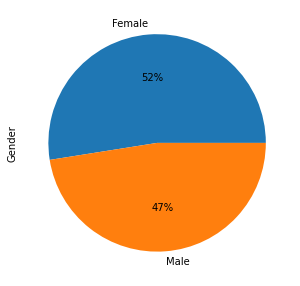

In [8]:
sex=data["Gender"].value_counts(normalize=True)#.reset_index()
#sex=sex.rename(columns={"index":"Sex","Gender":"Population"})
sex.plot(kind="pie", figsize=(5,5) ,autopct="%1.0f%%")



In [9]:
admitted=data["Admitted"].value_counts().reset_index()
admitted.rename(columns={"index":"Admission","Admitted":"Count"})

,Admission,Count
0,No,273
1,Yes,127


# Bivarient Analysis & Multivarient Analysis

<AxesSubplot:xlabel='Gender'>

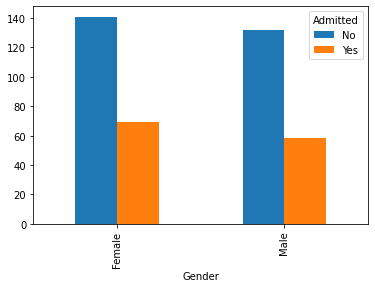

In [10]:
table1=pd.crosstab(data["Gender"],data["Admitted"])
table1.plot(kind="bar")
# admissions of the females are more then the males 

<AxesSubplot:xlabel='Admitted'>

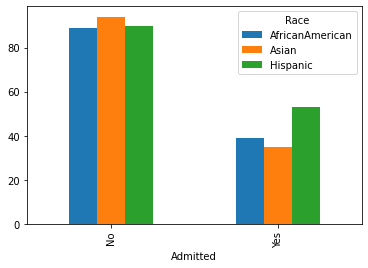

In [11]:
table2=pd.crosstab(data["Admitted"],data["Race"])
table2.plot(kind="bar")
# most of the admission happend from Hispanic ethinicity followed by AfericanAmerican and Asian 

In [12]:
avggre_score=data.groupby("Admitted")["GRE"].min()
avggre_score=pd.DataFrame(avggre_score)
avggre_score
# the minimum GRE score for the admisson is 300 and above

,GRE
Admitted,
No,220
Yes,300


In [13]:
avggpe_score=data.groupby("Admitted")["GPA"].min()
avggpe_score=pd.DataFrame(avggpe_score)
avggpe_score
# minimum GPA score to the admission 2.4 and above 

,GPA
Admitted,
No,2.26
Yes,2.42


In [14]:
table3=pd.crosstab(data["Admitted"],data["Rank"])
table3
# Most of the admiited students ranked 2nd followed by 1st and 3rd and least being 4th 

Rank,1,2,3,4
Admitted,,,,
No,28,97,93,55
Yes,33,54,28,12


In [15]:
table5=data.groupby(by=["Admitted","Race","Gender"])["GRE"].min()
table5=pd.DataFrame(table5)
table5
# mean&min GRE score for a female,male to be admitted from Hispanic ethinicity are 638,609 and 480,300
# mean&min GRE score for a female,male to be admitted from Asian are 650,655 and 500,520
# mean&min GRE score for a female,male to be admitted from are African American 583,590 and 340,440

GRE
Admitted Race            Gender     
No       AfricanAmerican Female  380
                         Male    220
         Asian           Female  380
                         Male    340
         Hispanic        Female  300
                         Male    300
Yes      AfricanAmerican Female  340
                         Male    440
         Asian           Female  500
                         Male    520
         Hispanic        Female  480
                         Male    300

In [16]:
table6=data.groupby(by=["Admitted","Race","Gender"])["GPA"].min()
table6=pd.DataFrame(table6)
table6
# mean&min GPA score for a female,male to be admitted from Hispanic ethinicity are 3.5,3.3 and 2.6,2.4
# mean&min GPA score for a female,male to be admitted from Asian are 3.5,3.4 and 2.9,2.8
# mean&min GPA score for a female,male to be admitted from are African American 3.5,3.6 and 2.6,3.0

GPA
Admitted Race            Gender      
No       AfricanAmerican Female  2.48
                         Male    2.42
         Asian           Female  2.55
                         Male    2.26
         Hispanic        Female  2.73
                         Male    2.69
Yes      AfricanAmerican Female  2.65
                         Male    3.05
         Asian           Female  2.91
                         Male    2.81
         Hispanic        Female  2.67
                         Male    2.42

In [17]:
data.describe()

,GRE,GPA,Rank
count,400.000000,400.000000,400.00000
mean,587.700000,3.389900,2.48500
std,115.516536,0.380567,0.94446
min,220.000000,2.260000,1.00000
25%,520.000000,3.130000,2.00000
50%,580.000000,3.395000,2.00000
75%,660.000000,3.670000,3.00000
max,800.000000,4.000000,4.00000


In [18]:
table7=data.groupby(by=["Admitted","Finacial status "])["GPA"].min()
table7=pd.DataFrame(table7)
table7

GPA
Admitted Finacial status       
No       High              2.48
         Low               2.42
         Medium            2.26
Yes      High              2.84
         Low               2.42
         Medium            2.62

# Feature engineering 

In [20]:
data.head()

,Admitted,GRE,GPA,Finacial status,Gender,Race,Rank
0,No,380,3.61,Low,Female,AfricanAmerican,3
1,Yes,660,3.67,Medium,Female,Asian,3
2,Yes,800,4.00,Medium,Female,Asian,1
3,Yes,640,3.19,Low,Male,Asian,4
4,No,520,2.93,High,Male,Asian,4


In [22]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [25]:
data["Sex"]=label_encoder.fit_transform(data["Gender"])
data["Ethinicity"]=label_encoder.fit_transform(data["Race"])
data["Econimic status"]=label_encoder.fit_transform(data["Finacial status "] )
data["Admission"]=label_encoder.fit_transform(data["Admitted"])

data_encoded=data.drop(["Gender","Race","Admitted","Finacial status "],axis=1)
data_encoded.head()

,GRE,GPA,Rank,Sex,Ethinicity,Econimic status,Admission
0,380,3.61,3,0,0,1,0
1,660,3.67,3,0,1,2,1
2,800,4.00,1,0,1,2,1
3,640,3.19,4,1,1,1,1
4,520,2.93,4,1,1,0,0


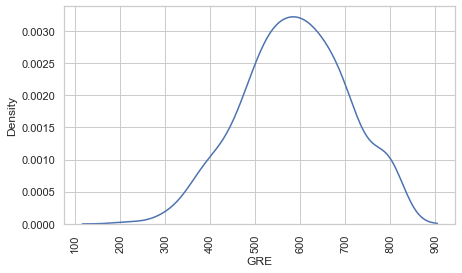

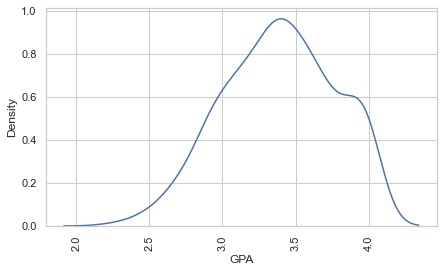

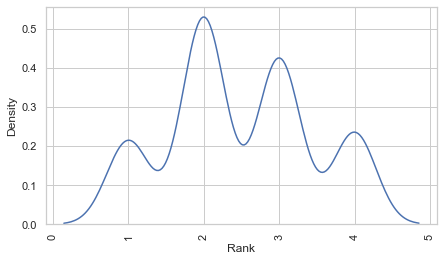

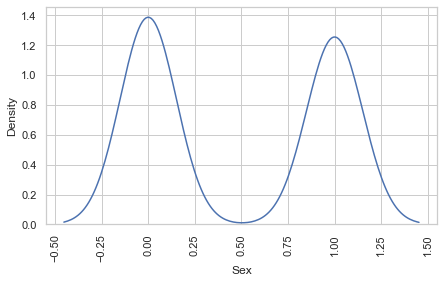

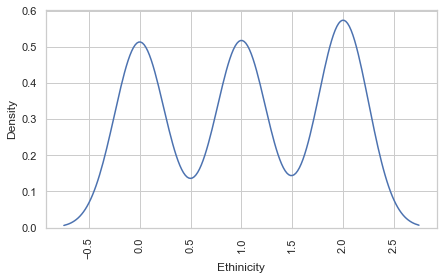

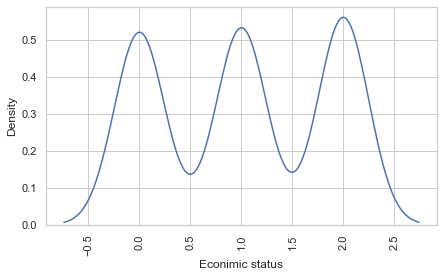

In [54]:
df=data_encoded.drop("Admission",axis=1)
for feature in df:
    plt.figure(figsize=(7,4))
    sns.set_theme(style="whitegrid")
    ax = sns.kdeplot(df[feature])
    plt.xticks(rotation=90)
    plt.show()
    

In [26]:
from sklearn.model_selection import train_test_split


Standardize features by removing the mean and scaling to unit variance.
The standard score of a sample x is calculated as:
z = (x - u) / s
where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.
Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [28]:
x=data_encoded.drop("Admission",axis=1)
y=data_encoded["Admission"]

In [29]:
x.shape,y.shape

((400, 6), (400,))

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=24, test_size=0.2)

In [31]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

# splitting the data into train test

(320, 6) (320,)
(80, 6) (80,)


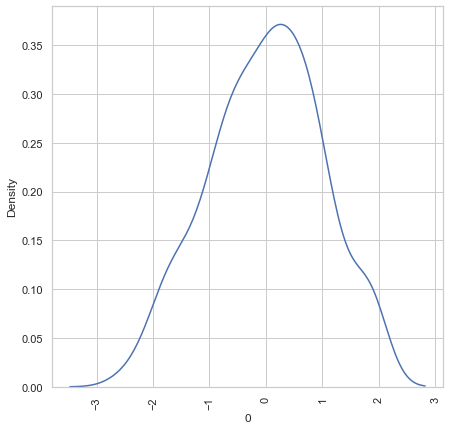

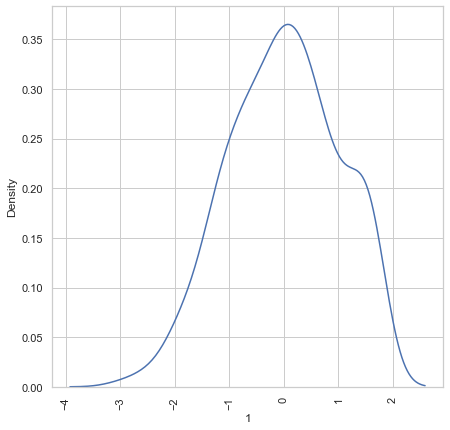

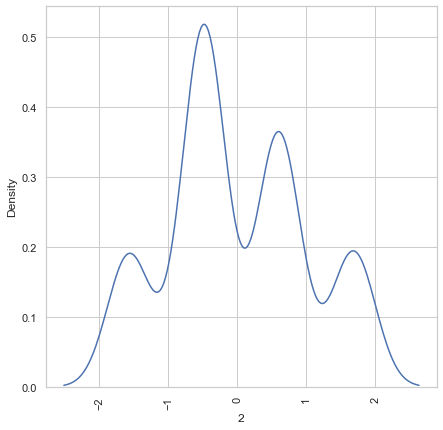

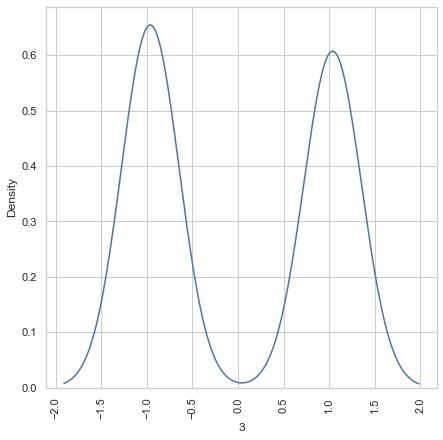

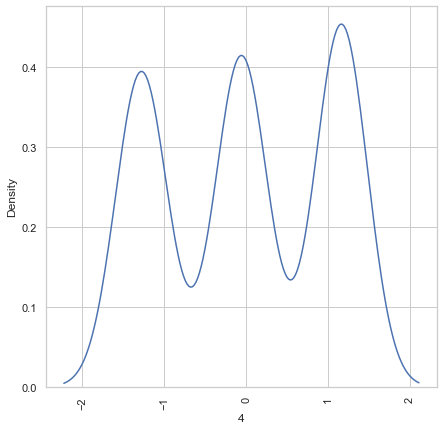

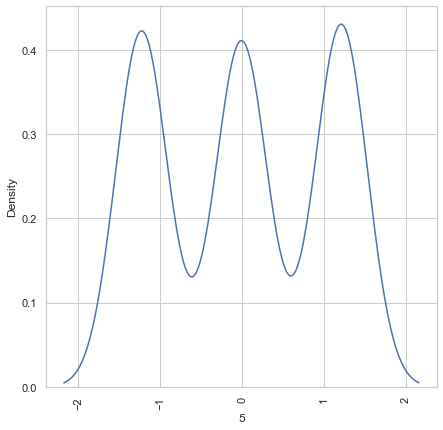

In [58]:
x_train = sc.fit_transform(x_train) # standerdized the data 
df_xtrain=pd.DataFrame(x_train)
df_xtrain
for i in df_xtrain:
    plt.figure(figsize=(7,7))
    sns.set_theme(style="whitegrid")
    ax = sns.kdeplot(df_xtrain[i])
    plt.xticks(rotation=90)
    plt.show()
    

In [33]:
from sklearn.decomposition import PCA

In [34]:
pc = PCA(n_components=len(x.columns))
x_train_pc=pc.fit_transform(x_train)
df_xtrain_pc=pd.DataFrame(x_train_pc,columns=['PC_' +str(i) for i in range(1,pc.n_components_+1)])
df_xtrain_pc.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,-0.197823,0.772514,-1.759082,0.379152,-0.163057,1.328323
1,3.209024,-0.683332,0.115950,-0.958690,1.068118,0.679915
2,-1.187643,-1.977044,-0.129520,-0.246434,0.964742,-0.953985
3,0.570964,0.365278,0.320802,-0.270596,-1.225277,1.046046
4,0.678666,-0.887516,-0.175496,-1.484874,0.834198,-0.683572


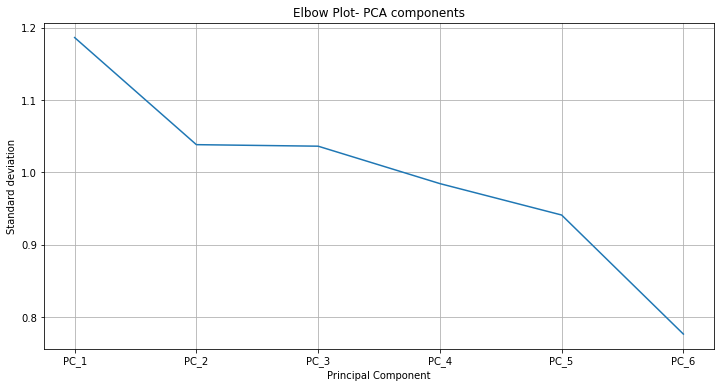

In [35]:
plt.figure(figsize=(12,6))
plt.plot(df_xtrain_pc.std())
plt.title('Elbow Plot- PCA components')
plt.xlabel('Principal Component')
plt.ylabel('Standard deviation')
plt.grid()
plt.show()

In [36]:
print("Varience of the feature :\n" ,data_encoded.var(),"\n","Standers deviation:\n",data_encoded.std())

Varience of the feature :
 GRE                13344.070175
GPA                    0.144831
Rank                   0.892005
Sex                    0.250000
Ethinicity             0.677788
Econimic status        0.671053
Admission              0.217237
dtype: float64 
 Standers deviation:
 GRE                115.516536
GPA                  0.380567
Rank                 0.944460
Sex                  0.500000
Ethinicity           0.823279
Econimic status      0.819178
Admission            0.466087
dtype: float64


# Model Building

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score, confusion_matrix, roc_curve, recall_score, precision_score, f1_score 
from sklearn import metrics

accuracy Score: 63.74999999999999
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77        72
           1       0.11      0.38      0.17         8

    accuracy                           0.64        80
   macro avg       0.51      0.52      0.47        80
weighted avg       0.83      0.64      0.71        80

roc_auc_score: 52.083333333333336


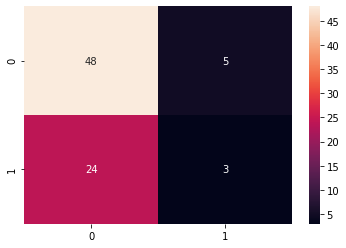

In [38]:
#creating a logistic regression model 
lr=LogisticRegression()
#fitting the model to train data 
lr_fit=lr.fit(x_train_pc,y_train)
#predict the the x_test values to the 
x_test_sc = sc.fit_transform(x_test)
x_test_pc= pc.fit_transform(x_test_sc)
lr_pred=lr.predict(x_test_pc)
#buiding a confusion matrix 
cnf_matrix=metrics.confusion_matrix(y_test,lr_pred)
# creating a heat map to the confusion matrix 
df=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)
# printing the accuracy score 
print("accuracy Score:",accuracy_score(lr_pred,y_test)*100)
# classification report 
print("Classification report:\n",classification_report (lr_pred,y_test))
# ROC-AUC SCore 
print("roc_auc_score:",roc_auc_score(lr_pred,y_test)*100)

In [39]:
lr_model_vales=dict(accuracy=accuracy_score(lr_pred,y_test)*100,ROC_AUC=roc_auc_score(lr_pred,y_test)*100,
                   recall=recall_score(lr_pred,y_test),
                   precision=precision_score(lr_pred,y_test),
                   f1_score=f1_score(lr_pred,y_test))

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77        72
           1       0.11      0.38      0.17         8

    accuracy                           0.64        80
   macro avg       0.51      0.52      0.47        80
weighted avg       0.83      0.64      0.71        80



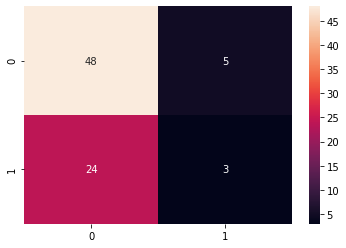

In [40]:
# model for Navi_byes 
nv=GaussianNB()
#fitting the model to train data 
nv_fit=nv.fit(x_train_pc,y_train)
#predict the the x_test values to the 
x_test_sc = sc.fit_transform(x_test)
x_test_pc= pc.fit_transform(x_test_sc)
nv_pred=nv.predict(x_test_pc)
#buiding a confusion matrix 
cnf_matrix=metrics.confusion_matrix(y_test,nv_pred)
# creating a heat map to the confusion matrix 
df=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)
# classification report 
print("Classification report:\n",classification_report (nv_pred,y_test))

In [41]:
nv_model_vales=dict(accuracy=accuracy_score(nv_pred,y_test)*100,ROC_AUC=roc_auc_score(nv_pred,y_test)*100
                   ,recall=recall_score(nv_pred,y_test),
                   precision=precision_score(nv_pred,y_test),

                    f1_score=f1_score(nv_pred,y_test))

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.68      0.76        68
           1       0.19      0.42      0.26        12

    accuracy                           0.64        80
   macro avg       0.53      0.55      0.51        80
weighted avg       0.77      0.64      0.68        80



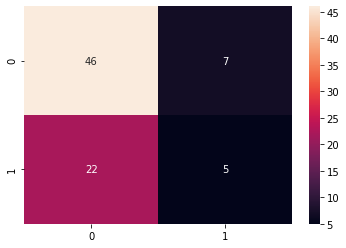

In [42]:
# creating Randomforest classifier
rf=RandomForestClassifier()
#fitting the model to train data 
rf_fit=rf.fit(x_train_pc,y_train)
#predict the the x_test values to the 
x_test_sc = sc.fit_transform(x_test)
x_test_pc= pc.fit_transform(x_test_sc)
rf_pred=rf.predict(x_test_pc)
#buiding a confusion matrix 
cnf_matrix=metrics.confusion_matrix(y_test,rf_pred)
# creating a heat map to the confusion matrix 
df=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)
# classification report 
print("Classification report:\n",classification_report (rf_pred,y_test))



In [43]:
rf_model_vales=dict(accuracy=accuracy_score(rf_pred,y_test)*100,ROC_AUC=roc_auc_score(rf_pred,y_test)*100
                   ,recall=recall_score(rf_pred,y_test),
                   precision=precision_score(rf_pred,y_test),

                    f1_score=f1_score(rf_pred,y_test))

[16:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.66      0.72        64
           1       0.19      0.31      0.23        16

    accuracy                           0.59        80
   macro avg       0.49      0.48      0.48        80
weighted avg       0.67      0.59      0.62        80



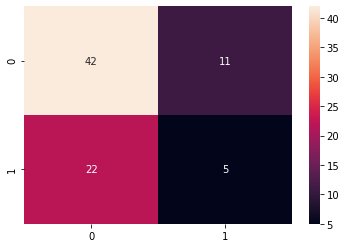

In [44]:
# creating xg classifier
xg=XGBClassifier()
#fitting the model to train data 
xg_fit=xg.fit(x_train_pc,y_train)
#predict the the x_test values to the 
x_test_sc = sc.fit_transform(x_test)
x_test_pc= pc.fit_transform(x_test_sc)
xg_pred=xg.predict(x_test_pc)
#buiding a confusion matrix 
cnf_matrix=metrics.confusion_matrix(y_test,xg_pred)
# creating a heat map to the confusion matrix 
df=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)
# classification report 
print("Classification report:\n",classification_report (xg_pred,y_test))

In [45]:
xg_model_vales=dict(accuracy=accuracy_score(xg_pred,y_test)*100,ROC_AUC=roc_auc_score(xg_pred,y_test)*100
                   ,recall=recall_score(xg_pred,y_test),
                   precision=precision_score(xg_pred,y_test),

                    f1_score=f1_score(xg_pred,y_test))

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.66      0.76        73
           1       0.07      0.29      0.12         7

    accuracy                           0.62        80
   macro avg       0.49      0.47      0.44        80
weighted avg       0.83      0.62      0.71        80



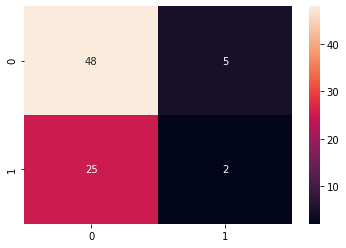

In [46]:
#creating SVM classifer 
svc=SVC()
#fitting the model to train data 
svc_fit=svc.fit(x_train_pc,y_train)
#predict the the x_test values to the 
x_test_sc = sc.fit_transform(x_test)
x_test_pc= pc.fit_transform(x_test_sc)
svc_pred=svc.predict(x_test_pc)
#buiding a confusion matrix 
cnf_matrix=metrics.confusion_matrix(y_test,svc_pred)
# creating a heat map to the confusion matrix 
df=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)
# classification report 
print("Classification report:\n",classification_report (svc_pred,y_test))

In [47]:
svc_model_vales=dict(accuracy=accuracy_score(svc_pred,y_test)*100,ROC_AUC=roc_auc_score(svc_pred,y_test)*100
                   ,recall=recall_score(svc_pred,y_test),
                   precision=precision_score(svc_pred,y_test),

                    f1_score=f1_score(svc_pred,y_test))

In [59]:

Model_performance=pd.DataFrame(data=[lr_model_vales,nv_model_vales,rf_model_vales,
                                    xg_model_vales,svc_model_vales],index=["LogisticRegression","Navi_byes","RandomForest",
                                                                           "XGboost","SupportVectorMachines"])

In [60]:

Model_performance

,accuracy,ROC_AUC,recall,precision,f1_score
LogisticRegression,63.75,52.083333,0.375000,0.111111,0.171429
Navi_byes,63.75,52.083333,0.375000,0.111111,0.171429
RandomForest,63.75,54.656863,0.416667,0.185185,0.256410
XGboost,58.75,48.437500,0.312500,0.185185,0.232558
SupportVectorMachines,62.50,47.162427,0.285714,0.074074,0.117647


<AxesSubplot:>

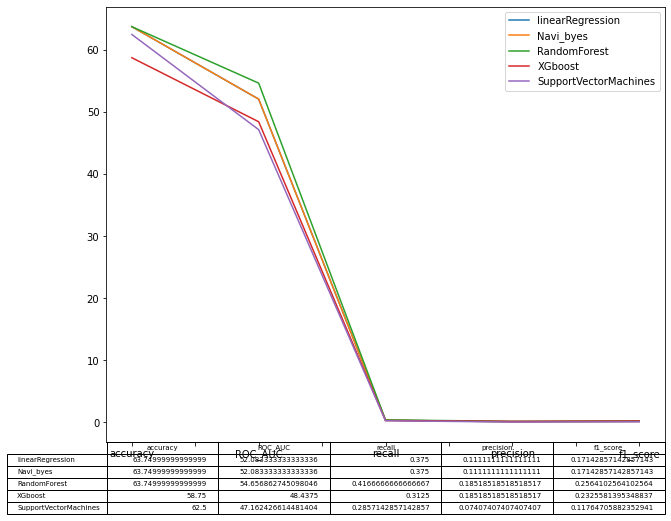

In [50]:
Model_performance.T.plot(kind="line",table=True,figsize=(10,8))

<AxesSubplot:>

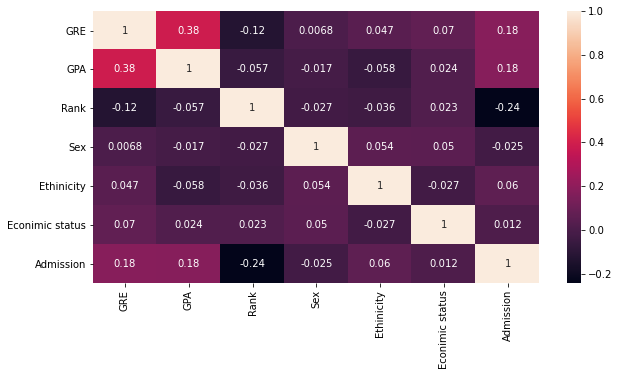

In [51]:
corr=data_encoded.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)

# we still can make the model perform better by doing hyperparameter techiniques which are not yet done in this project 